In [8]:
%matplotlib notebook
from src.main.mando_preprocessing import linear_resample
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from src.main.imu_data_io import read_parquet
from src.utils.imu_data_visualization import *
import matplotlib.dates as mdates
import re

In [9]:
def load_weight(path):
    # Find the weight file in the directory
    files = [f for f in os.listdir(path) if f.startswith('weights_') and f.endswith('.txt')]
    if not files:
        raise ValueError(f"No weight files found in directory: {path}")
    # We assume there's only one file matching the pattern, hence we take the first one
    file_path = os.path.join(path, files[0])
    # Load the data using pandas
    weights = pd.read_csv(file_path, header=None, names=['weight'])
#     weights = weights[45:] # for 7,10,14,15,16 ->50,20,23,25,45
    return weights['weight']

In [10]:
def plot_weights_data(data):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

    # Raw data plot
    fig.add_trace(go.Scatter(y=data, mode='lines', name='Raw Data', opacity=0.5, line=dict(color='green')), row=1, col=1)

    # Update yaxis properties
    fig.update_yaxes(title_text='Weight (grams)', row=1, col=1)

    # Update titles with light mode theme color    
    fig.update_layout(height=700, width=1000, title_text='Raw Weight Data', template='plotly_white')

    fig.show()

In [11]:
# def plot_weights_data(data):
#     """
#     Plot the given data with sample number on the x-axis.
# 
#     Args:
#         data (iterable): Iterable containing the data points to plot.
#     """
#     plt.figure(figsize=(10, 5))
#     plt.plot(range(len(data)), data, marker='o')
#     plt.xlabel('Sample Number')
#     plt.ylabel('Data Value')
#     plt.title('Data Plot')
#     plt.grid(True)
#     plt.show()

In [12]:
data = read_parquet('../data/processed/19')
weights = load_weight('../data/raw/19')
# plot_ly(weights)

# plot_ly(resampled_weights)

In [13]:
plot_weights_data(weights)
# plot_weights_data(resampled_weights)s

<IPython.core.display.Javascript object>


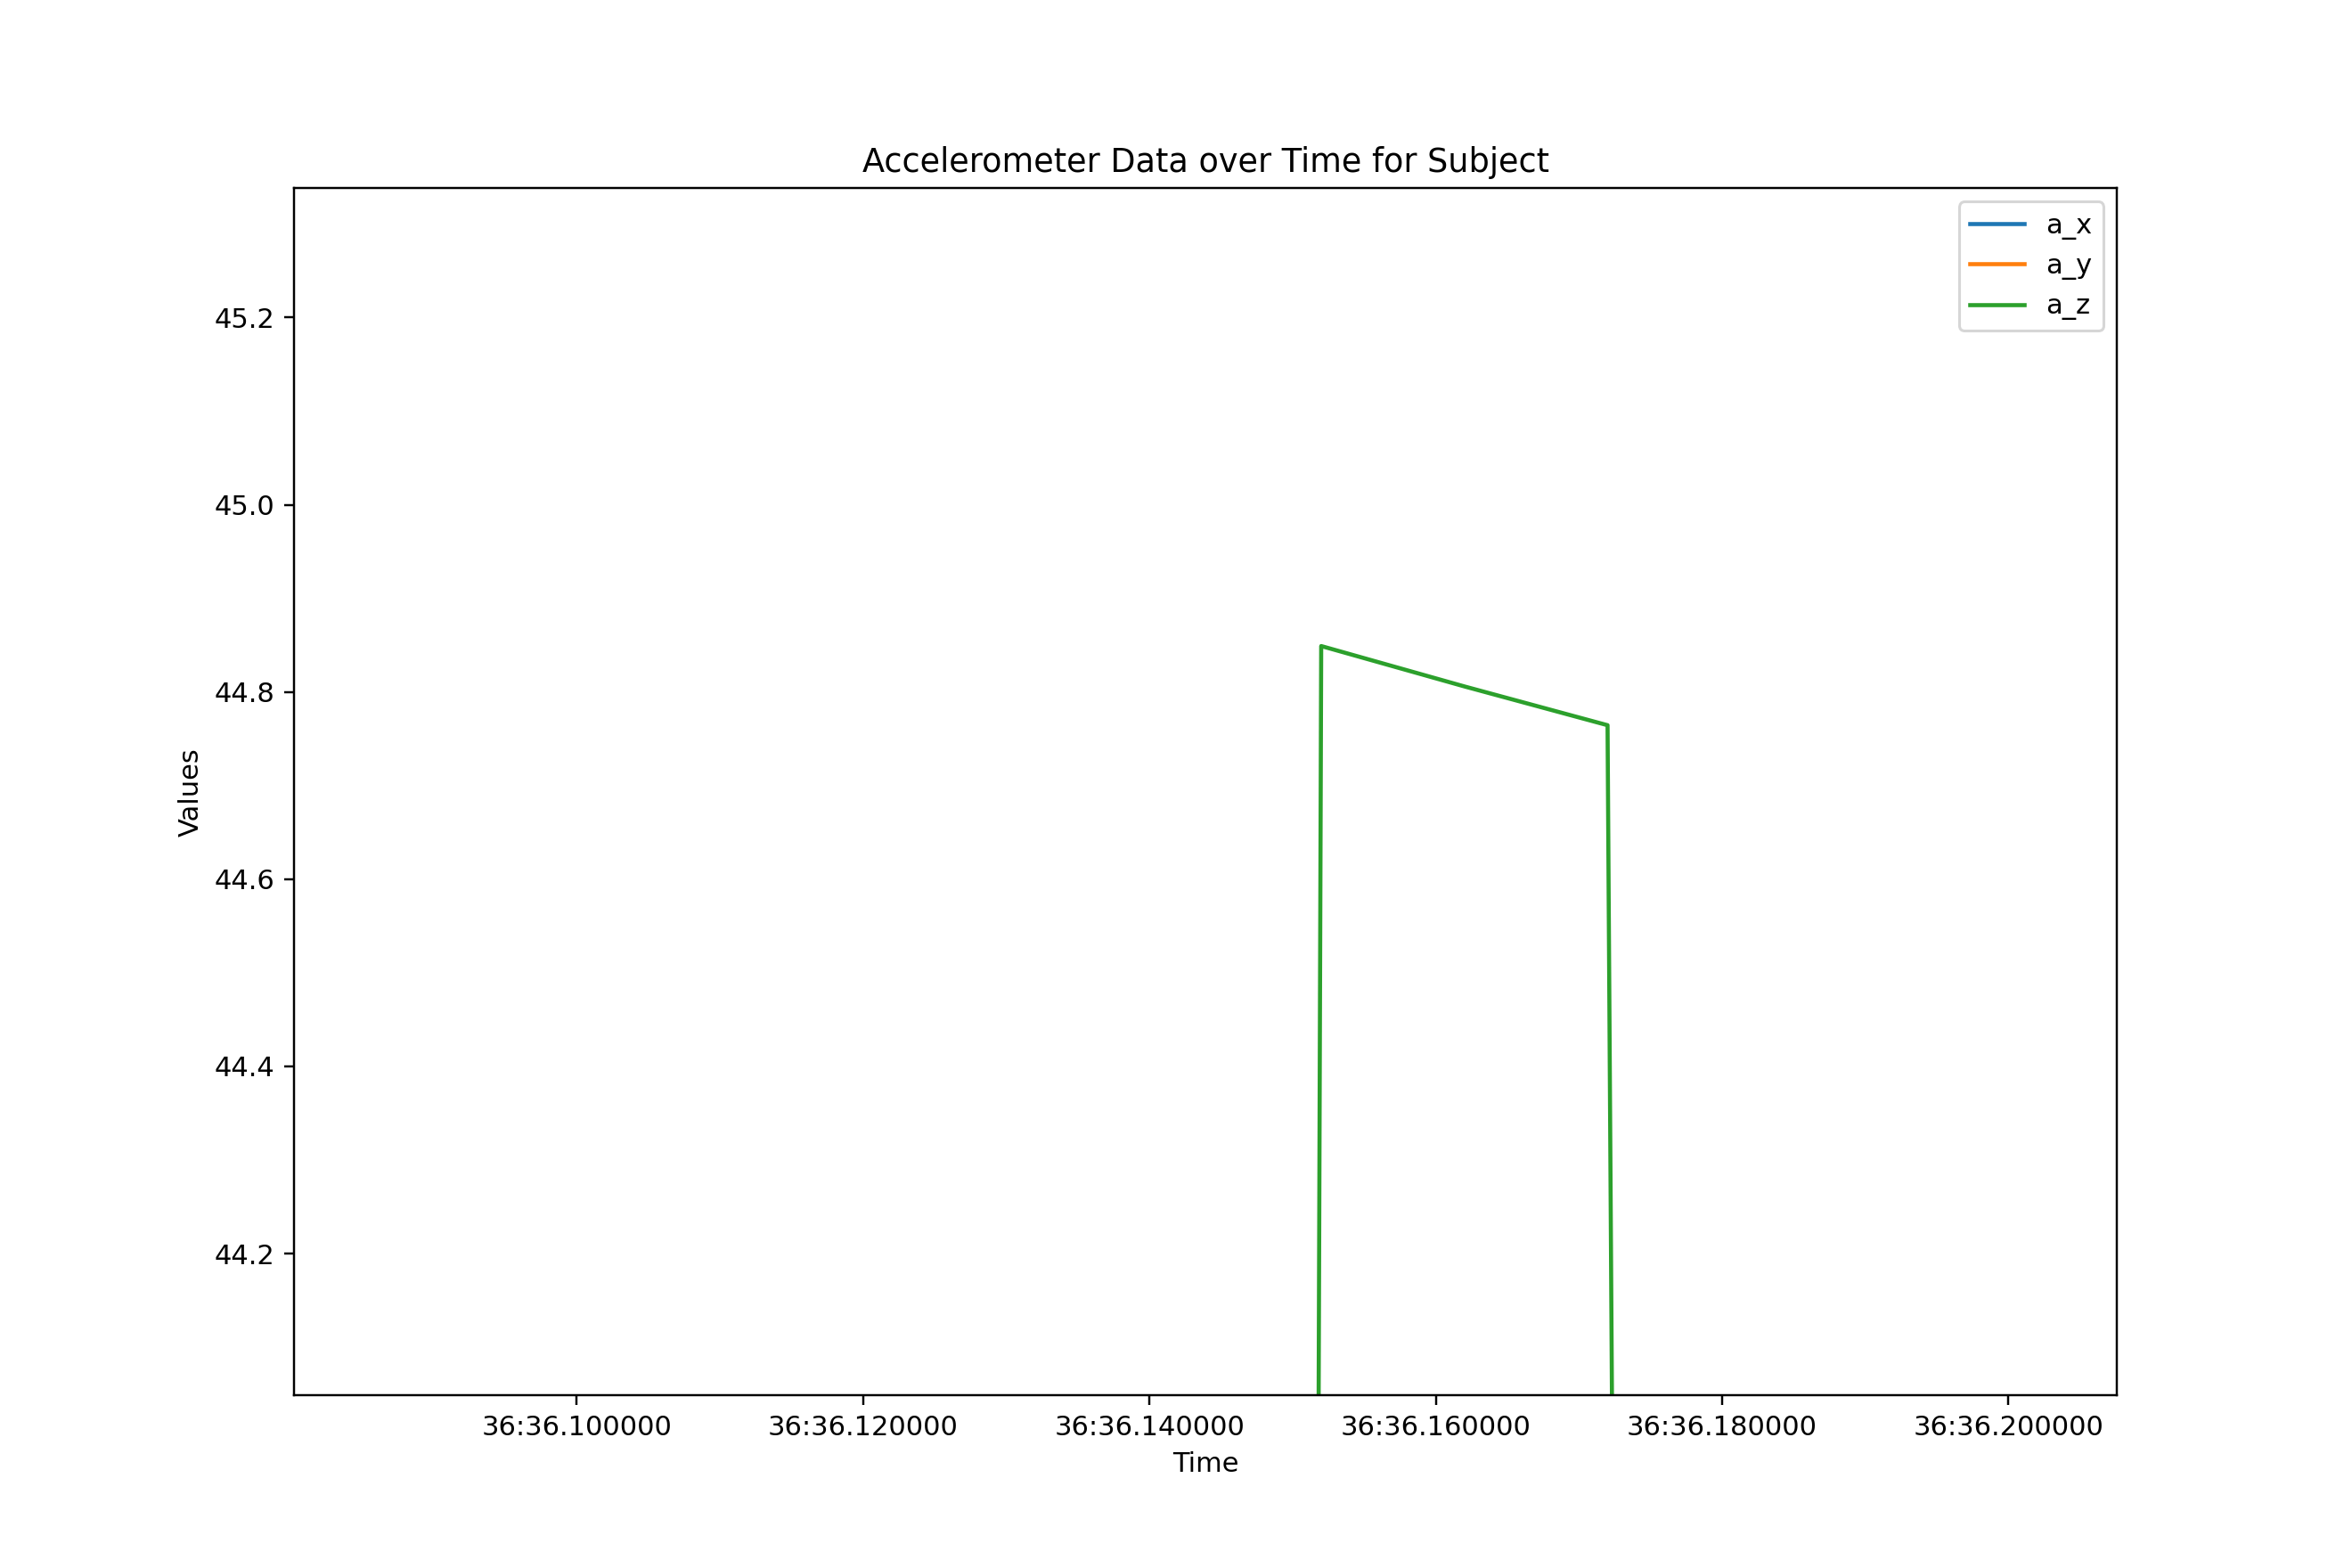

<IPython.core.display.Javascript object>


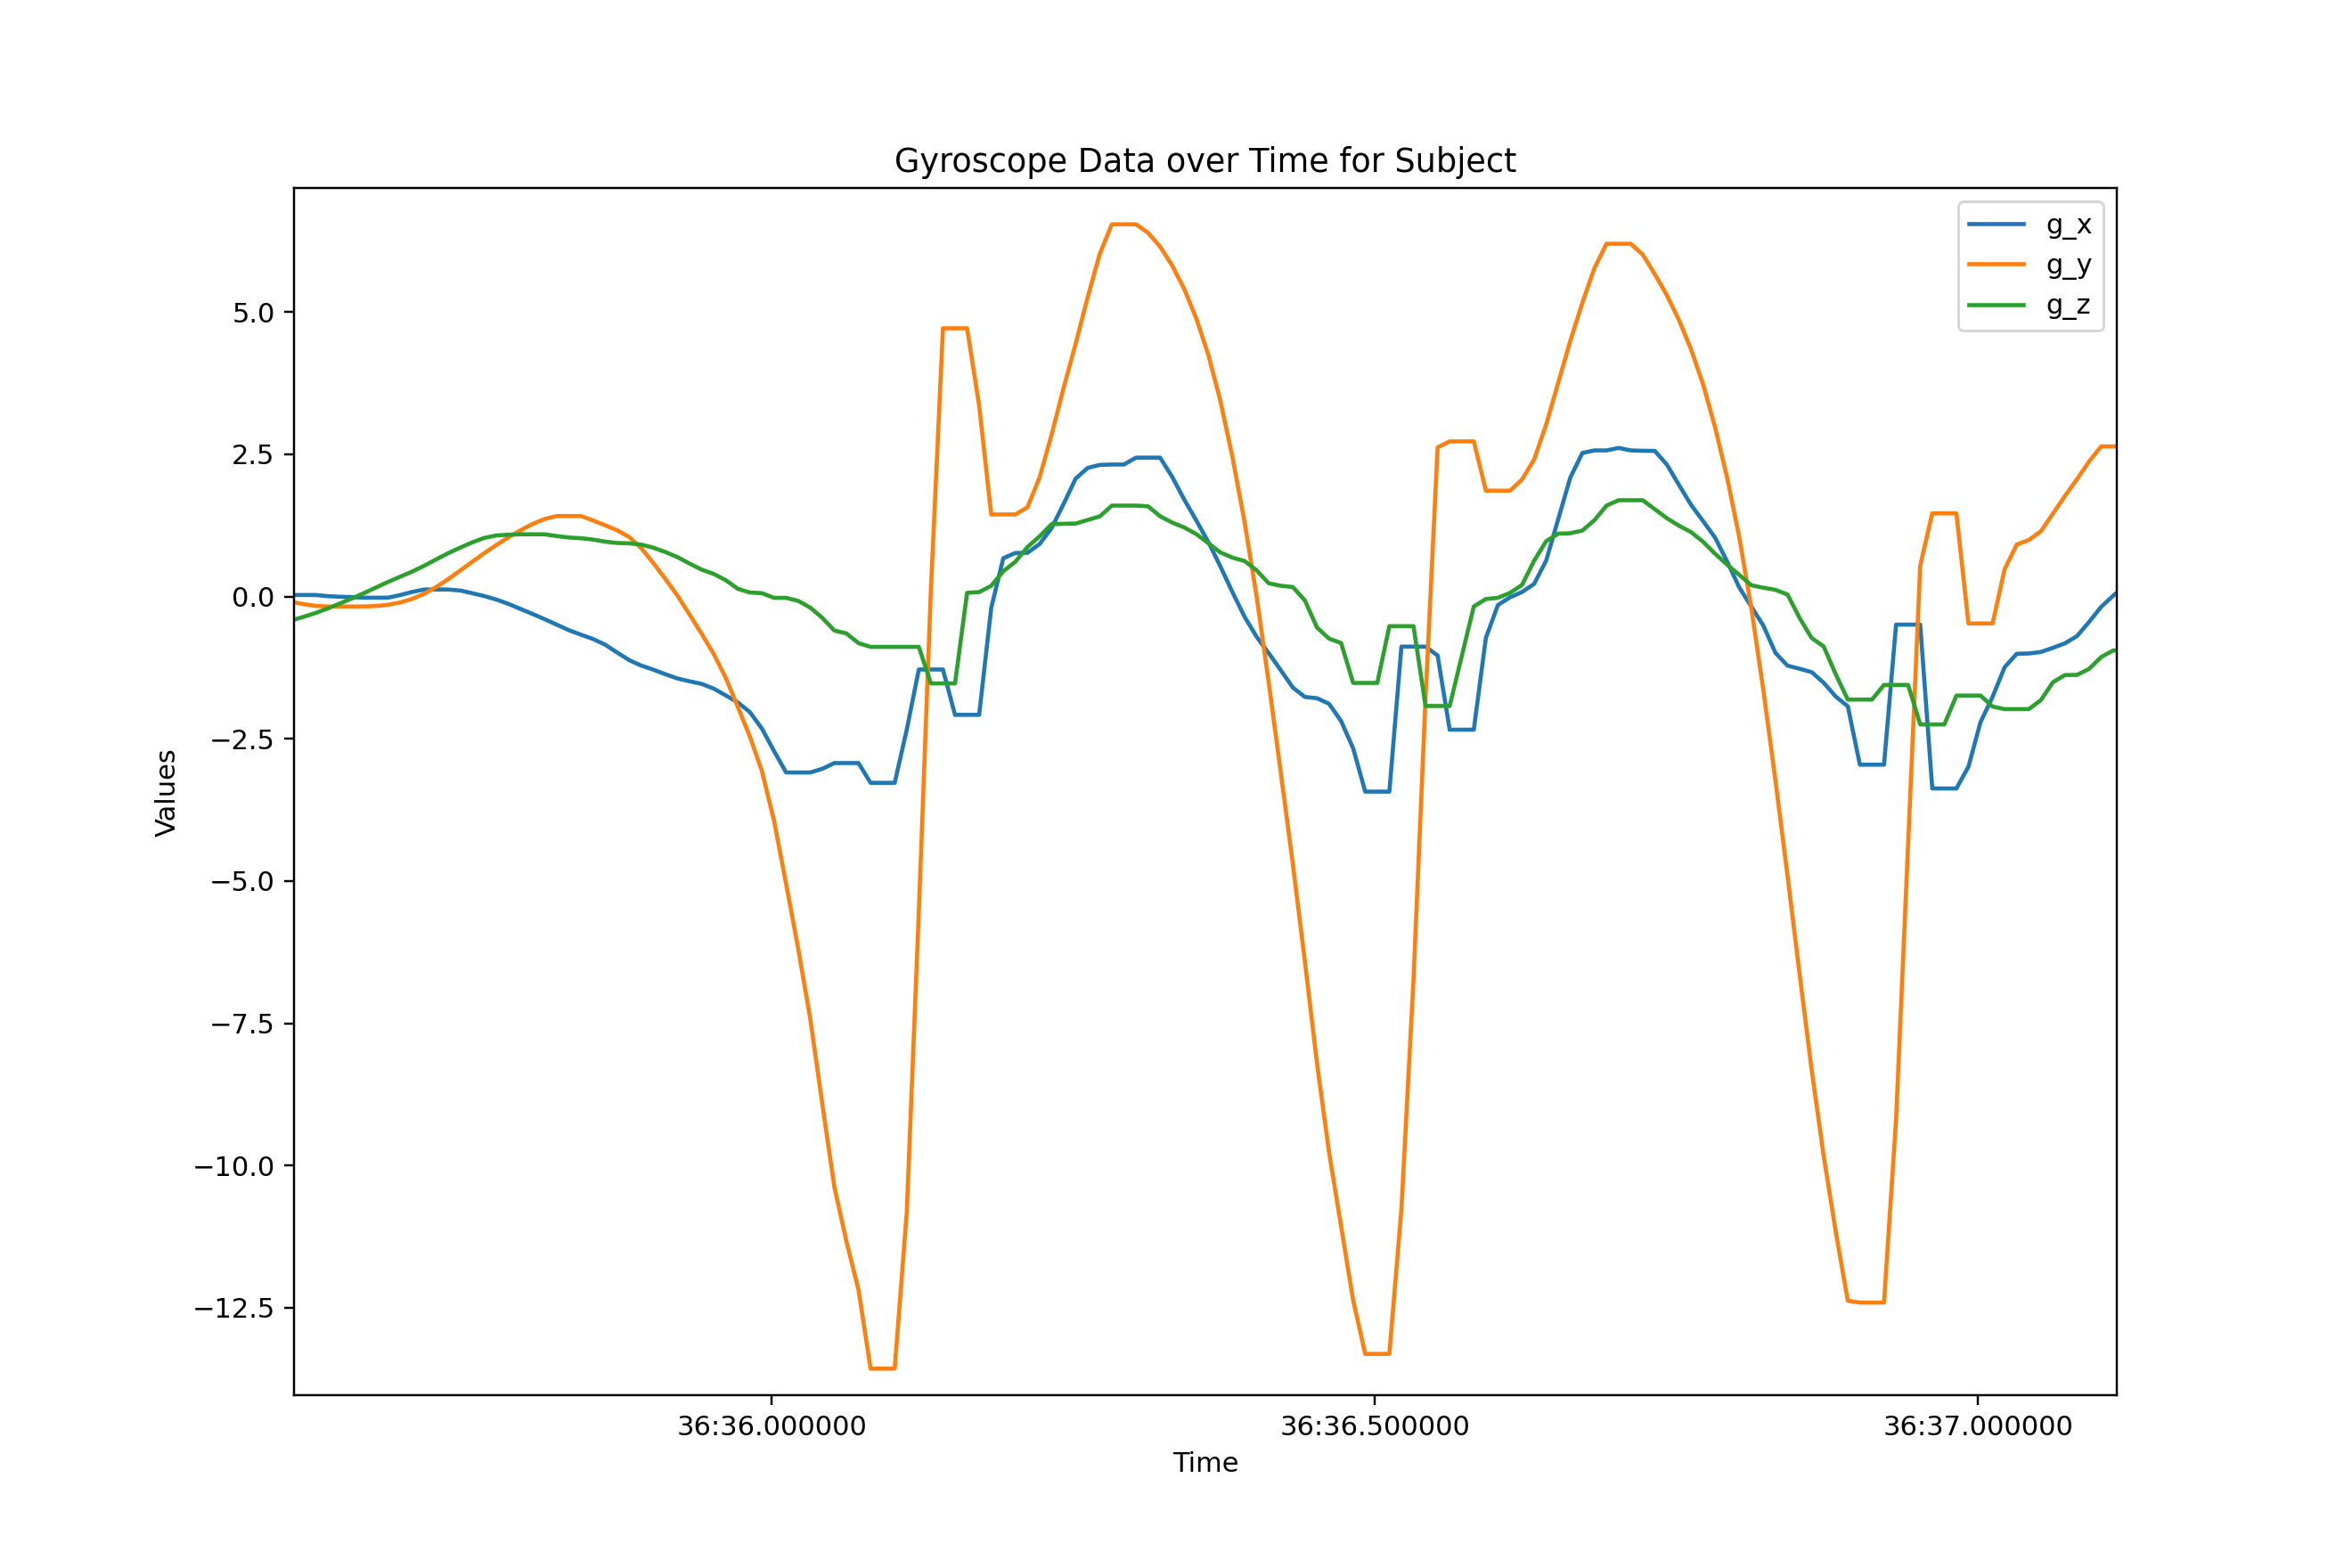

In [14]:
plot_parquet(data)